In [1]:
#!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 158M/163M [00:01<00:00, 83.1MB/s]
100% 163M/163M [00:01<00:00, 102MB/s] 


In [4]:
!ls

face-mask-dataset.zip  kaggle.json  sample_data


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


## Importing Neccessary Lbraries

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1641.jpg', 'with_mask_3053.jpg', 'with_mask_2496.jpg', 'with_mask_288.jpg', 'with_mask_2632.jpg']
['with_mask_3227.jpg', 'with_mask_662.jpg', 'with_mask_2242.jpg', 'with_mask_3190.jpg', 'with_mask_84.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1679.jpg', 'without_mask_1538.jpg', 'without_mask_3544.jpg', 'without_mask_3018.jpg', 'without_mask_1508.jpg']
['without_mask_2039.jpg', 'without_mask_2945.jpg', 'without_mask_88.jpg', 'without_mask_3364.jpg', 'without_mask_2670.jpg']


In [10]:
print("Number of images with mask: ", len(with_mask_files))
print("Number of images without mask: ", len(without_mask_files))

Number of images with mask:  3725
Number of images without mask:  3828


###**Creating Labels for the Two Classes of Images**

---
with mask  -->  1

without mask  -->  0


In [11]:
## Creaeting labels

with_mask_labels = [1] * 3725

without_mask_labels = [0] * 3828

In [12]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### **Displaying The images**

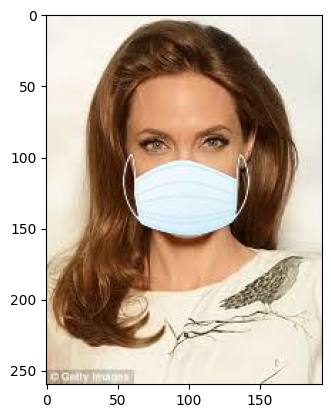

In [16]:
## Displaying the mask image

img = mpimg.imread('/content/data/with_mask/with_mask_1295.jpg')
imgplot = plt.imshow(img)
plt.show()

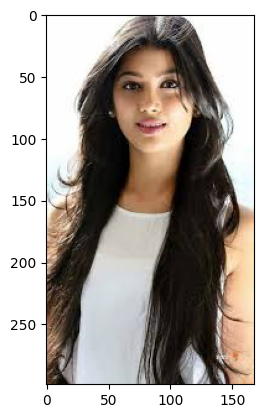

In [19]:
## Displaying image without mask

img = mpimg.imread('/content/data/without_mask/without_mask_1545.jpg')

imgplot = plt.imshow(img)
plt.show()

----
##**Image Processing**

*   Resize The Image
*   Convert the Images into Numpy Array



In [22]:
## Convert images to numpy array

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image =Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

## Without mask

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
type(data)

list

In [24]:
len(data)

7553

array([[[222, 222, 230],
        [222, 222, 230],
        [222, 223, 228],
        ...,
        [232, 233, 235],
        [232, 233, 235],
        [232, 233, 235]],

       [[222, 222, 230],
        [222, 222, 230],
        [222, 223, 228],
        ...,
        [232, 233, 235],
        [232, 233, 235],
        [232, 233, 235]],

       [[222, 222, 230],
        [222, 222, 230],
        [222, 223, 228],
        ...,
        [232, 233, 235],
        [232, 233, 235],
        [232, 233, 235]],

       ...,

       [[ 65,  83,  89],
        [ 65,  83,  88],
        [ 65,  83,  88],
        ...,
        [115,  32,  48],
        [116,  32,  48],
        [116,  31,  48]],

       [[ 50,  67,  77],
        [ 50,  67,  77],
        [ 50,  67,  77],
        ...,
        [116,  33,  49],
        [117,  32,  49],
        [119,  31,  48]],

       [[ 34,  49,  64],
        [ 34,  49,  64],
        [ 34,  49,  63],
        ...,
        [116,  30,  47],
        [117,  30,  47],
        [118,  31,  48]]], dtype=uint8)
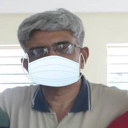

In [25]:
data[0]

In [26]:
data[0].shape

(128, 128, 3)

array([[[ 54,  54,  56],
        [ 55,  55,  57],
        [ 57,  55,  58],
        ...,
        [ 47,  51,  62],
        [ 46,  49,  64],
        [ 45,  48,  63]],

       [[ 57,  57,  59],
        [ 58,  58,  60],
        [ 59,  57,  60],
        ...,
        [ 49,  53,  63],
        [ 47,  50,  65],
        [ 46,  49,  64]],

       [[ 54,  53,  58],
        [ 55,  54,  59],
        [ 59,  57,  60],
        ...,
        [ 48,  55,  64],
        [ 48,  51,  66],
        [ 48,  51,  66]],

       ...,

       [[189, 215, 204],
        [187, 213, 202],
        [186, 212, 201],
        ...,
        [ 20, 102, 116],
        [ 14, 102, 114],
        [ 13, 103, 115]],

       [[192, 215, 205],
        [191, 214, 204],
        [190, 213, 203],
        ...,
        [ 19, 109, 121],
        [ 13, 108, 120],
        [ 12, 107, 119]],

       [[193, 216, 206],
        [193, 216, 206],
        [193, 216, 208],
        ...,
        [ 19, 118, 128],
        [ 14, 116, 127],
        [ 13, 114, 126]]], dtype=uint8)
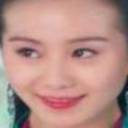

In [28]:
data[7258]

In [29]:
## Converting image list and label list to numpy arrays

X = np.array(data)
y = np.array(labels)

In [30]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [31]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


###**Train Test Split**

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (5664, 128, 128, 3) (1889, 128, 128, 3)


In [34]:
## Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[108, 122,  96],
        [109, 123,  97],
        [109, 123,  97],
        ...,
        [140, 142, 128],
        [141, 144, 130],
        [141, 145, 131]],

       [[115, 129, 103],
        [116, 130, 104],
        [116, 130, 104],
        ...,
        [152, 154, 139],
        [153, 156, 142],
        [155, 159, 145]],

       [[120, 134, 108],
        [120, 134, 108],
        [120, 134, 108],
        ...,
        [157, 159, 143],
        [156, 159, 143],
        [155, 159, 144]],

       ...,

       [[110, 115,  90],
        [112, 117,  93],
        [116, 120,  97],
        ...,
        [189, 189, 184],
        [131, 129, 125],
        [145, 139, 137]],

       [[110, 119,  92],
        [109, 118,  92],
        [111, 120,  94],
        ...,
        [133, 133, 134],
        [134, 132, 133],
        [160, 157, 159]],

       [[107, 120,  92],
        [110, 123,  95],
        [114, 126,  98],
        ...,
        [160, 160, 166],
        [168, 167, 173],
        [168, 167, 174]]], dtype=uint8)
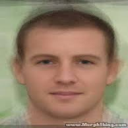

In [35]:
X_train[0]

In [36]:
X_train_scaled[0]

array([[[0.42352941, 0.47843137, 0.37647059],
        [0.42745098, 0.48235294, 0.38039216],
        [0.42745098, 0.48235294, 0.38039216],
        ...,
        [0.54901961, 0.55686275, 0.50196078],
        [0.55294118, 0.56470588, 0.50980392],
        [0.55294118, 0.56862745, 0.51372549]],

       [[0.45098039, 0.50588235, 0.40392157],
        [0.45490196, 0.50980392, 0.40784314],
        [0.45490196, 0.50980392, 0.40784314],
        ...,
        [0.59607843, 0.60392157, 0.54509804],
        [0.6       , 0.61176471, 0.55686275],
        [0.60784314, 0.62352941, 0.56862745]],

       [[0.47058824, 0.5254902 , 0.42352941],
        [0.47058824, 0.5254902 , 0.42352941],
        [0.47058824, 0.5254902 , 0.42352941],
        ...,
        [0.61568627, 0.62352941, 0.56078431],
        [0.61176471, 0.62352941, 0.56078431],
        [0.60784314, 0.62352941, 0.56470588]],

       ...,

       [[0.43137255, 0.45098039, 0.35294118],
        [0.43921569, 0.45882353, 0.36470588],
        [0.45490196, 0

----
##**Building A Convolutional Neural Network (CNN)**

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [41]:
## Compile Neural Network

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [42]:
## Training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
160/160 [==============================] - 9s 20ms/step - loss: 0.4894 - acc: 0.7824 - val_loss: 0.2963 - val_acc: 0.8995
Epoch 2/5
160/160 [==============================] - 2s 14ms/step - loss: 0.3135 - acc: 0.8760 - val_loss: 0.2995 - val_acc: 0.8748
Epoch 3/5
160/160 [==============================] - 3s 16ms/step - loss: 0.2732 - acc: 0.8893 - val_loss: 0.2270 - val_acc: 0.9083
Epoch 4/5
160/160 [==============================] - 3s 16ms/step - loss: 0.2344 - acc: 0.9090 - val_loss: 0.2157 - val_acc: 0.9189
Epoch 5/5
160/160 [==============================] - 2s 14ms/step - loss: 0.1838 - acc: 0.9278 - val_loss: 0.2656 - val_acc: 0.9030


###**Model Evaluation**

In [43]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy: ', accuracy)
print('Test Loss: ', loss)

60/60 [==============================] - 1s 12ms/step - loss: 0.2894 - acc: 0.8814
Test Accuracy:  0.881418764591217
Test Loss:  0.2894292175769806


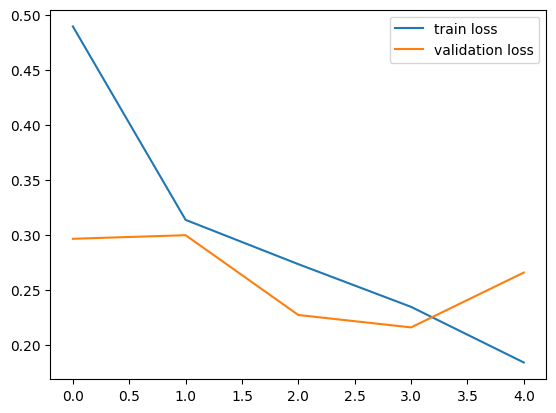

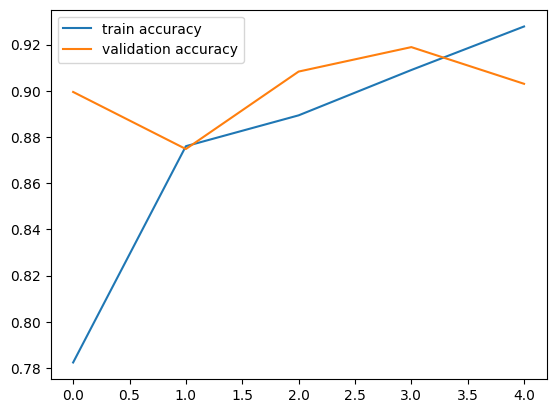

In [45]:
h = history

## Plot loss values
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

## Plot accuracy values
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

##**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1006.jpg


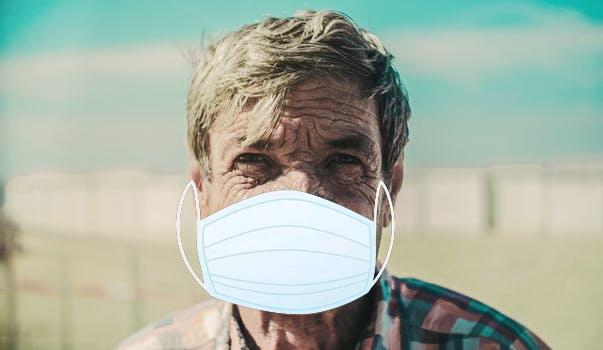

1/1 [==============================] - 0s 281ms/step
[[0.08795715 0.86883664]]
1
The person in the image is wearing a mask


In [47]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')